# Forecasting and Evaluating Property Values in Melbourne 
### By Michael Le

![Melbourne](Melbourne.png) 

This is my first Kaggle data-analysis and data-modelling project, employing various Machine Learning techniques including Supervised, Unsupervised Learning. Including exploration to predict house prices in Melbourne, leveraging a dataset spanning the years from 2016-2017. 

Note that the columns for Bedroom2 has changed to Bedroom and SellerG to Seller to avoid confusion due to typo errors.

In [364]:
#This is to add in raw button and  Python 3 compat
#Ensure the Notebook has added support for raw_input and %debug, as of 1.0. in Github
import sys
if sys.version_info[0] >= 3:
    raw_input = input

# Step 1. Loading the Dataset for the Melbourne House Prices

In [436]:
#Importing the Pandas and Numpy Package
import pandas as pd
import numpy as np

In [437]:
housing_pd = pd.read_csv("Desktop/melbourne_house_prices/Melbourne_housing_FULL.csv")
housing_pd.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [438]:
housing_pd.shape

(34857, 21)

In [439]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   Seller         34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom        26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

# Step 2. Data Cleaning

## Re-order the columns of the data-frame

In [440]:
housing_pd = housing_pd[['Price','Suburb', 'Address', 'Rooms', 'Type','Method', 'Seller',
       'Date', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']]

## Check data info

In [441]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          27247 non-null  float64
 1   Suburb         34857 non-null  object 
 2   Address        34857 non-null  object 
 3   Rooms          34857 non-null  int64  
 4   Type           34857 non-null  object 
 5   Method         34857 non-null  object 
 6   Seller         34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom        26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

## Count how many null values for each of the columns in the housing dataset. 

In [442]:
housing_pd.isnull().sum()

Price             7610
Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
Seller               0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [443]:
housing_pd.shape

(34857, 21)

## Check if there are any duplicated rows?

In [444]:
housing_pd.duplicated().any()

True

# Remove duplicated rows

In [445]:
housing_pd = housing_pd.drop_duplicates()
housing_pd.shape

(34856, 21)

In [446]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          27247 non-null  float64
 1   Suburb         34856 non-null  object 
 2   Address        34856 non-null  object 
 3   Rooms          34856 non-null  int64  
 4   Type           34856 non-null  object 
 5   Method         34856 non-null  object 
 6   Seller         34856 non-null  object 
 7   Date           34856 non-null  object 
 8   Distance       34855 non-null  float64
 9   Postcode       34855 non-null  float64
 10  Bedroom        26639 non-null  float64
 11  Bathroom       26630 non-null  float64
 12  Car            26128 non-null  float64
 13  Landsize       23046 non-null  float64
 14  BuildingArea   13741 non-null  float64
 15  YearBuilt      15550 non-null  float64
 16  CouncilArea    34853 non-null  object 
 17  Lattitude      26880 non-null  float64
 18  Longtitude 

### One approach to cleaning data (impute the missing values)

In [447]:
housing_pd.isnull().sum()

Price             7609
Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
Seller               0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [448]:
housing_pd['Price'] = housing_pd['Price'].fillna(housing_pd['Price'].median())
housing_pd['Bedroom'] = housing_pd['Bedroom'].fillna(housing_pd['Bedroom'].median())
housing_pd['Distance'] = housing_pd['Distance'].fillna(housing_pd['Distance'].median())
housing_pd['Car'] = housing_pd['Car'].fillna(housing_pd['Car'].median())
housing_pd['Landsize'] = housing_pd['Landsize'].fillna(housing_pd['Landsize'].median())
housing_pd['BuildingArea'] = housing_pd['BuildingArea'].fillna(housing_pd['BuildingArea'].median())
housing_pd['Propertycount'] = housing_pd['Propertycount'].fillna(housing_pd['Propertycount'].median())
housing_pd['Bathroom'] = housing_pd['Bathroom'].fillna(housing_pd['Bathroom'].median())


## Check any more null values

In [449]:
housing_pd.isnull().sum()

Price                0
Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
Seller               0
Date                 0
Distance             0
Postcode             1
Bedroom              0
Bathroom             0
Car                  0
Landsize             0
BuildingArea         0
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        0
dtype: int64

#### Drop columns, we do not need

In [450]:
housing_pd = housing_pd.drop(columns = ["YearBuilt"])
housing_pd.isnull().sum()

Price               0
Suburb              0
Address             0
Rooms               0
Type                0
Method              0
Seller              0
Date                0
Distance            0
Postcode            1
Bedroom             0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
CouncilArea         3
Lattitude        7976
Longtitude       7976
Regionname          3
Propertycount       0
dtype: int64

In [451]:
housing_pd.dropna(axis=0,subset=['Postcode'], inplace=True)

In [452]:
housing_pd.isnull().sum()

Price               0
Suburb              0
Address             0
Rooms               0
Type                0
Method              0
Seller              0
Date                0
Distance            0
Postcode            0
Bedroom             0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
CouncilArea         2
Lattitude        7975
Longtitude       7975
Regionname          2
Propertycount       0
dtype: int64

### Drop the rest of the rows

In [453]:
housing_pd = housing_pd.dropna()

In [454]:
housing_pd.isnull().sum()

Price            0
Suburb           0
Address          0
Rooms            0
Type             0
Method           0
Seller           0
Date             0
Distance         0
Postcode         0
Bedroom          0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [455]:
housing_pd.shape

(26880, 20)

### Second approach to cleaning data: Get rid off all rows containing NaN alphameric and numeric values. (Last Resort)

In [456]:
#housing_pd = housing_pd.dropna()
#housing_pd.info()


## May add other methods to cleaning data. Which would impact the results of the prediction on house prices in Melbourne. 

## Change the columns Bedroom, Bathroom, Car, YearBuilt and Property Count into the right metrics.

In [457]:

housing_pd['Bedroom'] = housing_pd['Bedroom'].astype(int)
housing_pd['Bathroom'] = housing_pd['Bathroom'].astype(int)
housing_pd['Car'] = housing_pd['Car'].astype(int)
housing_pd['Propertycount'] = housing_pd['Propertycount'].astype(int)

## Check the info

In [458]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26880 entries, 0 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          26880 non-null  float64
 1   Suburb         26880 non-null  object 
 2   Address        26880 non-null  object 
 3   Rooms          26880 non-null  int64  
 4   Type           26880 non-null  object 
 5   Method         26880 non-null  object 
 6   Seller         26880 non-null  object 
 7   Date           26880 non-null  object 
 8   Distance       26880 non-null  float64
 9   Postcode       26880 non-null  float64
 10  Bedroom        26880 non-null  int32  
 11  Bathroom       26880 non-null  int32  
 12  Car            26880 non-null  int32  
 13  Landsize       26880 non-null  float64
 14  BuildingArea   26880 non-null  float64
 15  CouncilArea    26880 non-null  object 
 16  Lattitude      26880 non-null  float64
 17  Longtitude     26880 non-null  float64
 18  Regionname 

## Refer to https://stackoverflow.com/questions/15891038/change-column-type-in-pandas

## Check the head of the cleaned dataframe for the Melbourne housing data

In [459]:
housing_pd.head()

,Price,Suburb,Address,Rooms,Type,Method,Seller,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,870000.0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/09/2016,2.5,3067.0,2,1,1,126.0,136.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,1480000.0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2,1,1,202.0,136.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,1035000.0,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2,1,0,156.0,79.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
3,870000.0,Abbotsford,18/659 Victoria St,3,u,VB,Rounds,4/02/2016,2.5,3067.0,3,2,1,0.0,136.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
4,1465000.0,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3,2,0,134.0,150.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019


## Getting rid of columns we do not need (might be useful for Step 3.)

In [460]:
housing_pd = housing_pd.drop(['Address','Date'],axis=1)

#Check the head to see if we got rid of Address and Data
housing_pd.head()

,Price,Suburb,Rooms,Type,Method,Seller,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,870000.0,Abbotsford,2,h,SS,Jellis,2.5,3067.0,2,1,1,126.0,136.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,1480000.0,Abbotsford,2,h,S,Biggin,2.5,3067.0,2,1,1,202.0,136.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,1035000.0,Abbotsford,2,h,S,Biggin,2.5,3067.0,2,1,0,156.0,79.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
3,870000.0,Abbotsford,3,u,VB,Rounds,2.5,3067.0,3,2,1,0.0,136.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
4,1465000.0,Abbotsford,3,h,SP,Biggin,2.5,3067.0,3,2,0,134.0,150.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019


# Step 3. Data Exploration and analysis 

In [461]:
from sklearn.model_selection import train_test_split
y = housing_pd["Price"]
X = housing_pd.drop(["Price"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [462]:
train_data = X_train.join(y_train)
# Remove duplicate columns
train_data = train_data.loc[:, ~train_data.columns.duplicated()]
train_data

,Suburb,Rooms,Type,Method,Seller,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price
23522,Wantirna,4,h,PI,Ray,14.7,3152.0,4,2,3,785.0,136.0,Knox City Council,-37.85297,145.23815,Eastern Metropolitan,5424,870000.0
5674,Keilor East,3,h,S,McDonald,12.8,3033.0,3,2,1,549.0,136.0,Brimbank City Council,-37.74960,144.85890,Western Metropolitan,5629,675000.0
26755,Aspendale Gardens,4,h,SP,Barry,21.5,3195.0,4,2,1,521.0,136.0,Kingston City Council,-38.02040,145.11920,South-Eastern Metropolitan,2243,915000.0
3126,Caulfield South,3,t,SN,Gary,9.3,3162.0,3,2,2,183.0,193.0,Glen Eira City Council,-37.88760,145.02090,Southern Metropolitan,5051,870000.0
12544,Carlton North,2,h,S,Nelson,3.2,3054.0,2,1,0,101.0,136.0,Melbourne City Council,-37.79180,144.97210,Northern Metropolitan,3106,870000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20823,South Yarra,2,u,S,Hodges,2.7,3141.0,2,2,1,521.0,66.0,Melbourne City Council,-37.83543,145.00009,Southern Metropolitan,14887,870000.0
23380,Port Melbourne,2,h,SP,Marshall,3.5,3207.0,2,2,2,197.0,136.0,Melbourne City Council,-37.83754,144.93954,Southern Metropolitan,8648,1515000.0
30932,Ardeer,3,h,SP,Barry,12.8,3022.0,3,1,1,521.0,118.0,Brimbank City Council,-37.78070,144.80031,Western Metropolitan,1281,630000.0
26160,Maribyrnong,5,h,SP,hockingstuart,4.3,3032.0,5,2,2,521.0,136.0,Maribyrnong City Council,-37.78737,144.89999,Western Metropolitan,4918,1330000.0


## Plotting the heatmap for the individual features

<Axes: >

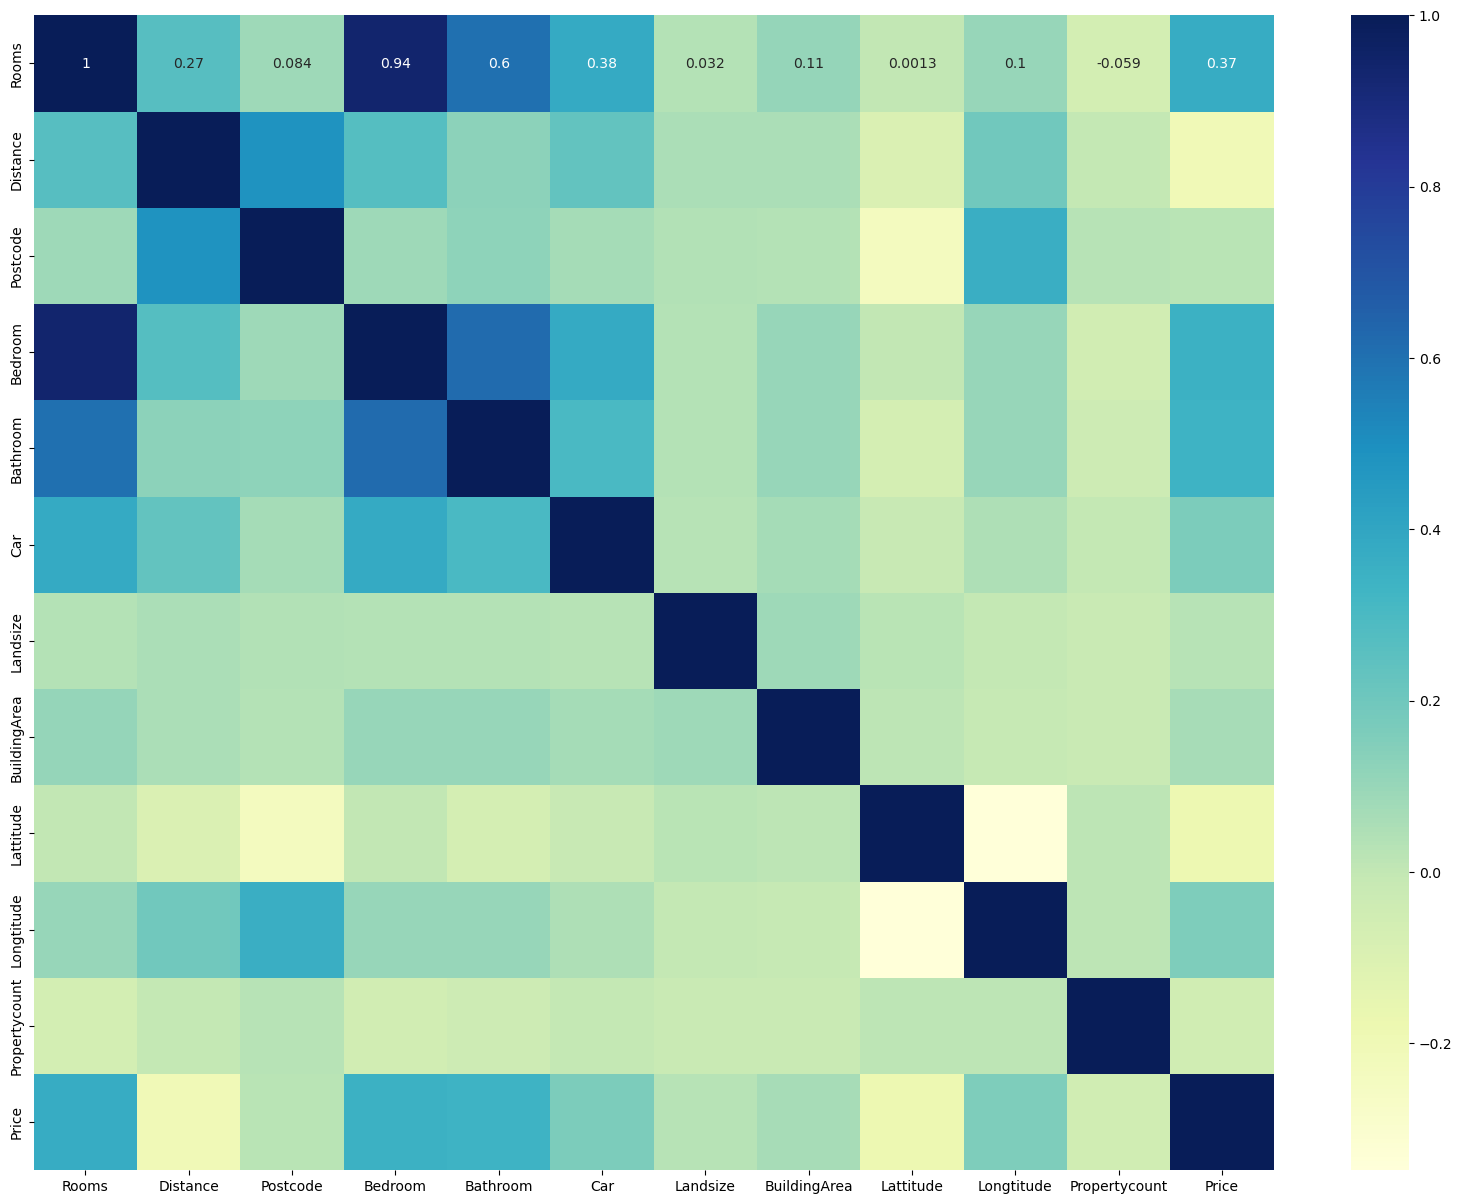

In [463]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sns.heatmap(train_data.drop(['Regionname', 'Suburb','Seller','CouncilArea','Type','Method'],axis=1).corr(),annot=True,cmap='YlGnBu')

## Scatter plot of all the houses in Melbourne based on Price

<Axes: xlabel='Lattitude', ylabel='Longtitude'>

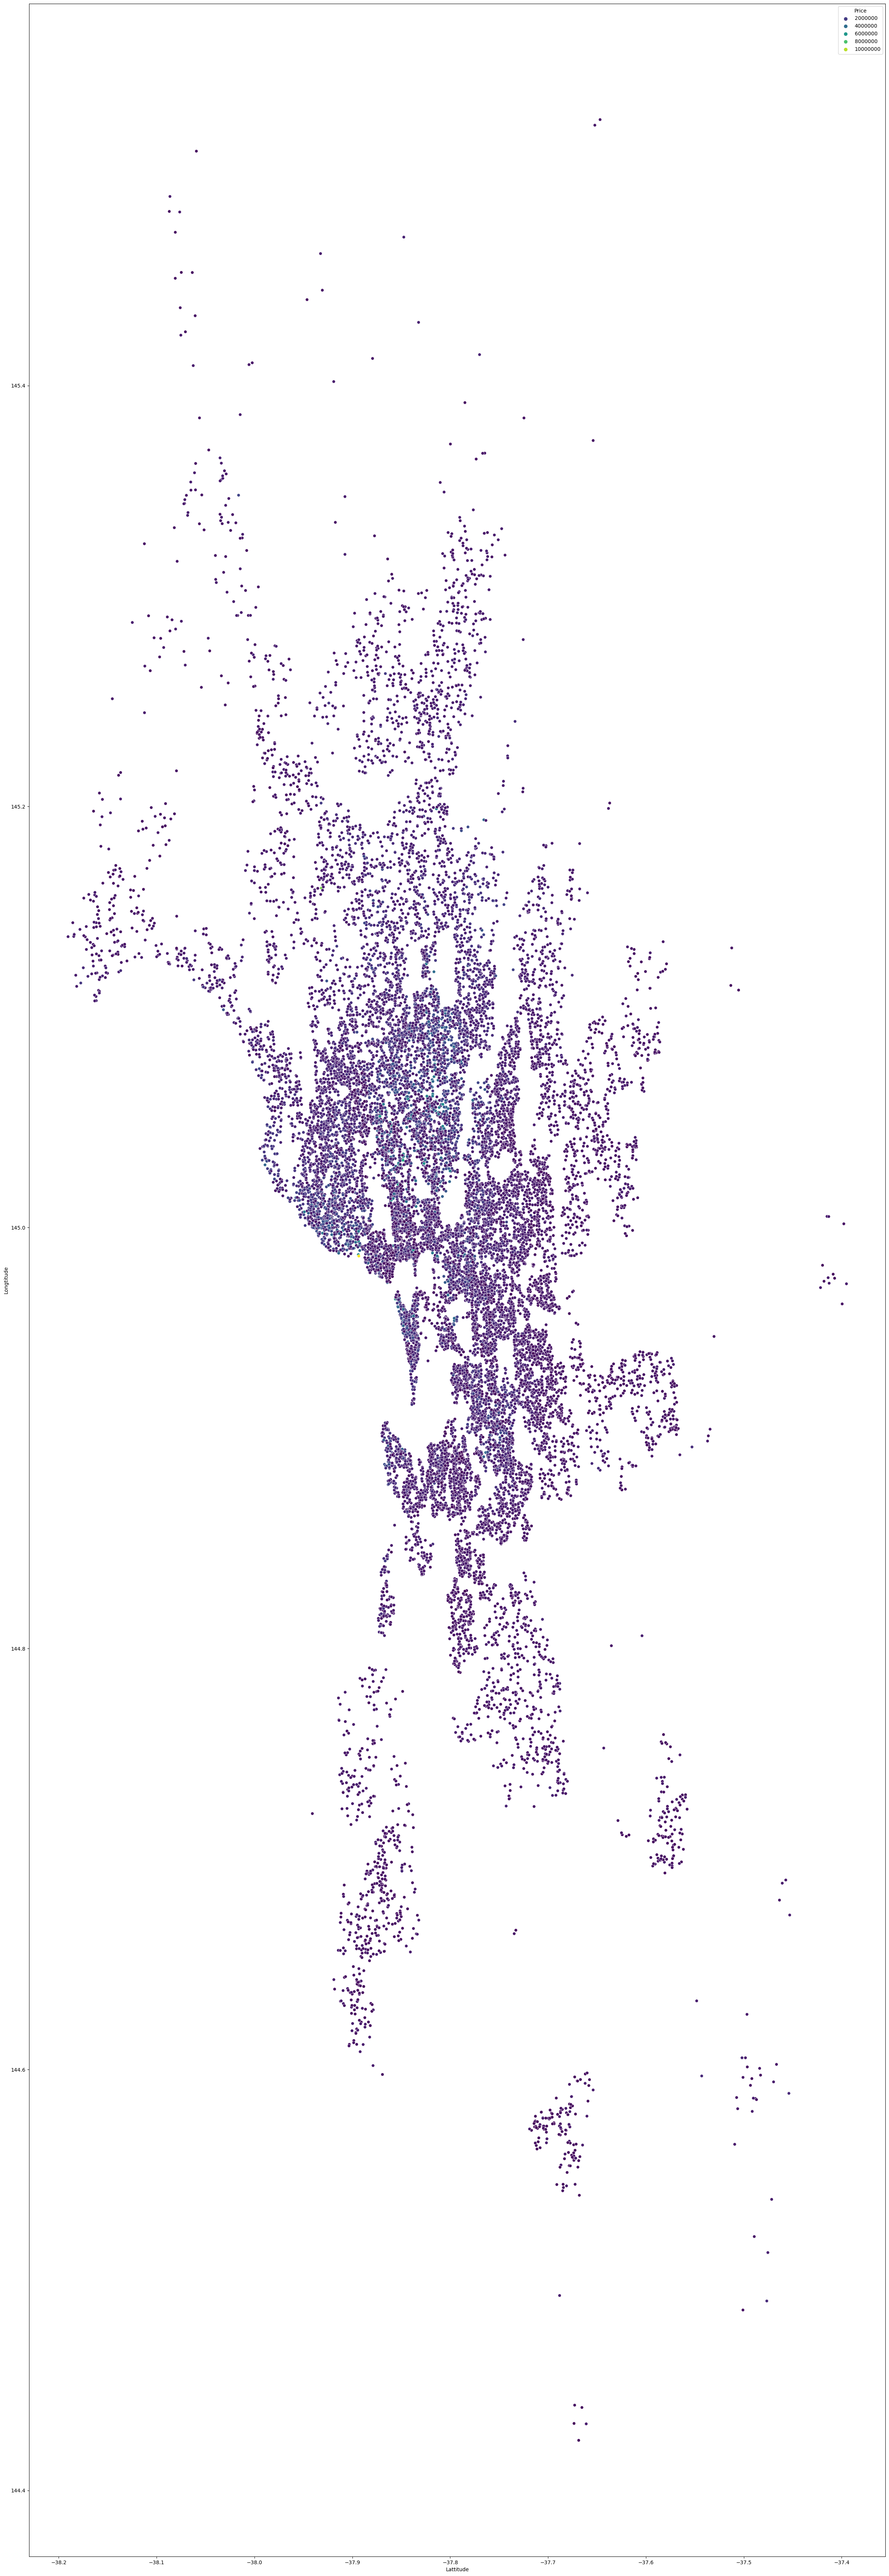

In [464]:
plt.figure(figsize=(30,90))
sns.scatterplot(x = "Lattitude", y = "Longtitude" ,data=train_data,hue="Price",palette = "viridis" )

In [465]:
# We add 1 inside for each log function to ensure our numeric values are valid
train_data['total_rooms'] = np.log(train_data['Rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['Bedroom'] + 1)
train_data['total_distance'] = np.log(train_data['Distance'] + 1)
train_data['total_car_spots'] = np.log(train_data['Car'] + 1)
train_data['total_Landsize'] = np.log(train_data['Landsize'] + 1)
train_data['total_Building_Area'] = np.log(train_data['BuildingArea'] + 1)
train_data['total_Property_count'] = np.log(train_data['Propertycount'] + 1)
train_data['total_Price'] = np.log(train_data['Price'] + 1)


### Histogram of our features

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bedroom'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>],
       [<Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'total_distance'}>,
        <Axes: title={'center': 'total_car_spots'}>],
       [<Axes: title={'center': 'total_Landsize'}>,
        <Axes: title={'center': 'total_Building_Area'}>,
        <Axes: title={'center': 'total_Property_count'}>,
        <Axes: title={'center': 'total_Price'}>]], dtype=object)

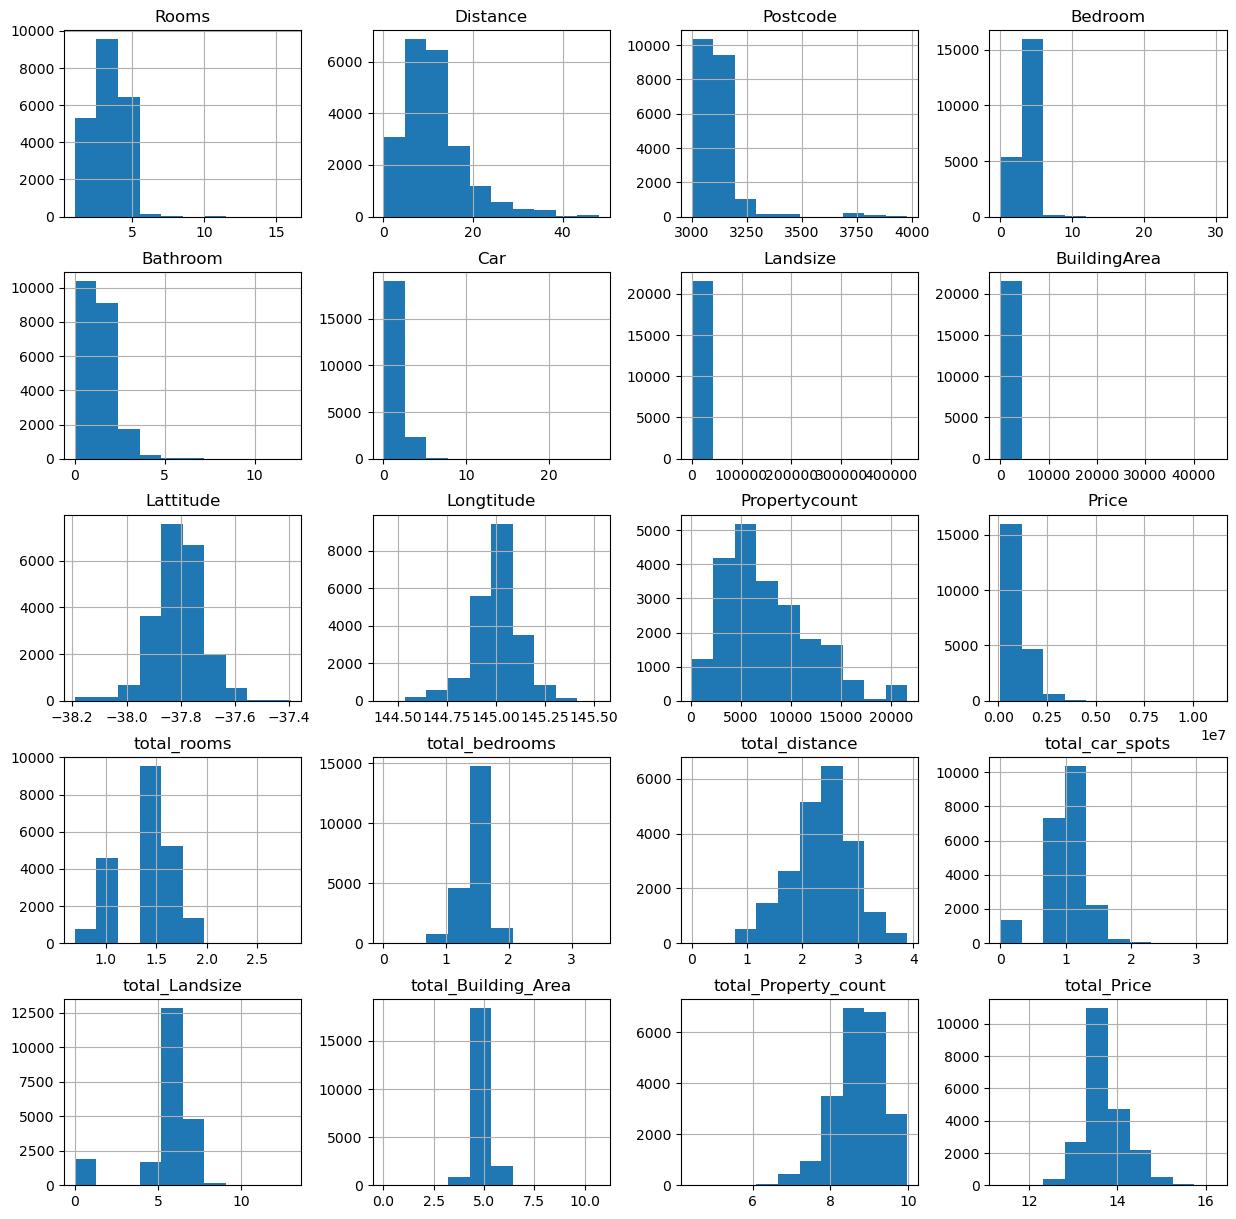

In [466]:
train_data.hist(figsize=(15,15))

# Step 4. Finalise the current data-frame 

### Apply using one-hot encoding

In [467]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26880 entries, 0 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          26880 non-null  float64
 1   Suburb         26880 non-null  object 
 2   Rooms          26880 non-null  int64  
 3   Type           26880 non-null  object 
 4   Method         26880 non-null  object 
 5   Seller         26880 non-null  object 
 6   Distance       26880 non-null  float64
 7   Postcode       26880 non-null  float64
 8   Bedroom        26880 non-null  int32  
 9   Bathroom       26880 non-null  int32  
 10  Car            26880 non-null  int32  
 11  Landsize       26880 non-null  float64
 12  BuildingArea   26880 non-null  float64
 13  CouncilArea    26880 non-null  object 
 14  Lattitude      26880 non-null  float64
 15  Longtitude     26880 non-null  float64
 16  Regionname     26880 non-null  object 
 17  Propertycount  26880 non-null  int32  
dtypes: float64(

In [468]:
housing_pd['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [469]:
housing_pd['Method'].unique()

array(['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA'], dtype=object)

In [470]:
housing_pd['Seller'].unique()

array(['Jellis', 'Biggin', 'Rounds', 'Nelson', 'Collins', 'Greg',
       'Philip', 'LITTLE', 'Kay', 'Beller', 'Marshall', 'Brad',
       'Maddison', 'Barry', 'Considine', 'Rendina', 'Propertyau',
       'McDonald', 'Prof.', 'Harcourts', 'hockingstuart', 'Thomson',
       'Buxton', 'RT', "Sotheby's", 'Cayzer', 'Chisholm', 'McGrath',
       'Brace', 'Miles', 'Love', 'Barlow', 'Sweeney', 'Village', 'Jas',
       'Gunn&Co', 'Burnham', 'Williams', 'Point', 'Compton', 'FN',
       'Raine&Horne', 'Hunter', 'Noel', 'Hodges', 'Gary', 'Ray',
       'Fletchers', 'Woodards', 'Raine', 'Walshe', 'Alexkarbon', 'Weda',
       'Frank', 'Stockdale', 'Tim', 'Buxton/Marshall', 'Purplebricks',
       'Moonee', 'HAR', 'Edward', 'RW', 'North', 'Ascend', 'Christopher',
       'Bekdon', 'Mandy', 'R&H', 'Fletchers/One', 'Assisi', 'One',
       'Century', "O'Brien", 'C21', 'Bayside', 'Anderson', 'Paul',
       'Smart', 'First', 'Matthew', 'Nick', 'Lindellas', 'Allens',
       'Bells', 'Trimson', 'Douglas', 'GL',

In [471]:
housing_pd = housing_pd.drop(columns = ["Seller"])
housing_pd = pd.get_dummies(housing_pd, columns=['Type','Method'],dtype='int')
housing_pd.head()

,Price,Suburb,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,...,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,870000.0,Abbotsford,2,2.5,3067.0,2,1,1,126.0,136.0,...,0,0,0,0,0,0,0,1,0,0
1,1480000.0,Abbotsford,2,2.5,3067.0,2,1,1,202.0,136.0,...,0,0,0,1,0,0,0,0,0,0
2,1035000.0,Abbotsford,2,2.5,3067.0,2,1,0,156.0,79.0,...,0,0,0,1,0,0,0,0,0,0
3,870000.0,Abbotsford,3,2.5,3067.0,3,2,1,0.0,136.0,...,1,0,0,0,0,0,0,0,1,0
4,1465000.0,Abbotsford,3,2.5,3067.0,3,2,0,134.0,150.0,...,0,0,0,0,0,0,1,0,0,0


In [472]:
housing_pd = housing_pd.drop(columns= ["Suburb","CouncilArea","Regionname"])
housing_pd.head()

,Price,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,Lattitude,...,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,870000.0,2,2.5,3067.0,2,1,1,126.0,136.0,-37.8014,...,0,0,0,0,0,0,0,1,0,0
1,1480000.0,2,2.5,3067.0,2,1,1,202.0,136.0,-37.7996,...,0,0,0,1,0,0,0,0,0,0
2,1035000.0,2,2.5,3067.0,2,1,0,156.0,79.0,-37.8079,...,0,0,0,1,0,0,0,0,0,0
3,870000.0,3,2.5,3067.0,3,2,1,0.0,136.0,-37.8114,...,1,0,0,0,0,0,0,0,1,0
4,1465000.0,3,2.5,3067.0,3,2,0,134.0,150.0,-37.8093,...,0,0,0,0,0,0,1,0,0,0


In [473]:
housing_pd.dtypes

Price            float64
Rooms              int64
Distance         float64
Postcode         float64
Bedroom            int32
Bathroom           int32
Car                int32
Landsize         float64
BuildingArea     float64
Lattitude        float64
Longtitude       float64
Propertycount      int32
Type_h             int32
Type_t             int32
Type_u             int32
Method_PI          int32
Method_PN          int32
Method_S           int32
Method_SA          int32
Method_SN          int32
Method_SP          int32
Method_SS          int32
Method_VB          int32
Method_W           int32
dtype: object

### Feature Engineering

<Axes: >

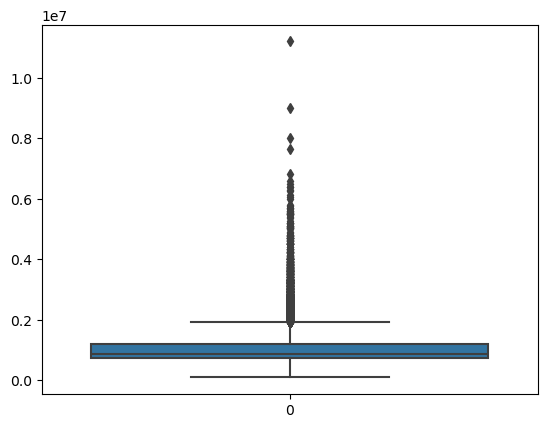

In [474]:

sns.boxplot(housing_pd['Price'])

In [475]:
def outliners(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    ls = df.index[(df[ft] < lower)|(df[ft] > upper)]
    return ls

In [476]:
predictor = 'Price'

In [477]:
index_list = []
for feature in predictor:
    index_list.extend(outliners(housing_pd,ft = predictor))

In [478]:
def remove(df,ls):
    ls = sorted(set(ls))
    df=df.drop(ls)
    return df

In [479]:
df_cleaned=remove(housing_pd,index_list)

In [480]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25001 entries, 0 to 34856
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          25001 non-null  float64
 1   Rooms          25001 non-null  int64  
 2   Distance       25001 non-null  float64
 3   Postcode       25001 non-null  float64
 4   Bedroom        25001 non-null  int32  
 5   Bathroom       25001 non-null  int32  
 6   Car            25001 non-null  int32  
 7   Landsize       25001 non-null  float64
 8   BuildingArea   25001 non-null  float64
 9   Lattitude      25001 non-null  float64
 10  Longtitude     25001 non-null  float64
 11  Propertycount  25001 non-null  int32  
 12  Type_h         25001 non-null  int32  
 13  Type_t         25001 non-null  int32  
 14  Type_u         25001 non-null  int32  
 15  Method_PI      25001 non-null  int32  
 16  Method_PN      25001 non-null  int32  
 17  Method_S       25001 non-null  int32  
 18  Method_SA  

### Check correlation Matrix to reduce any more variables for Feature Engineering

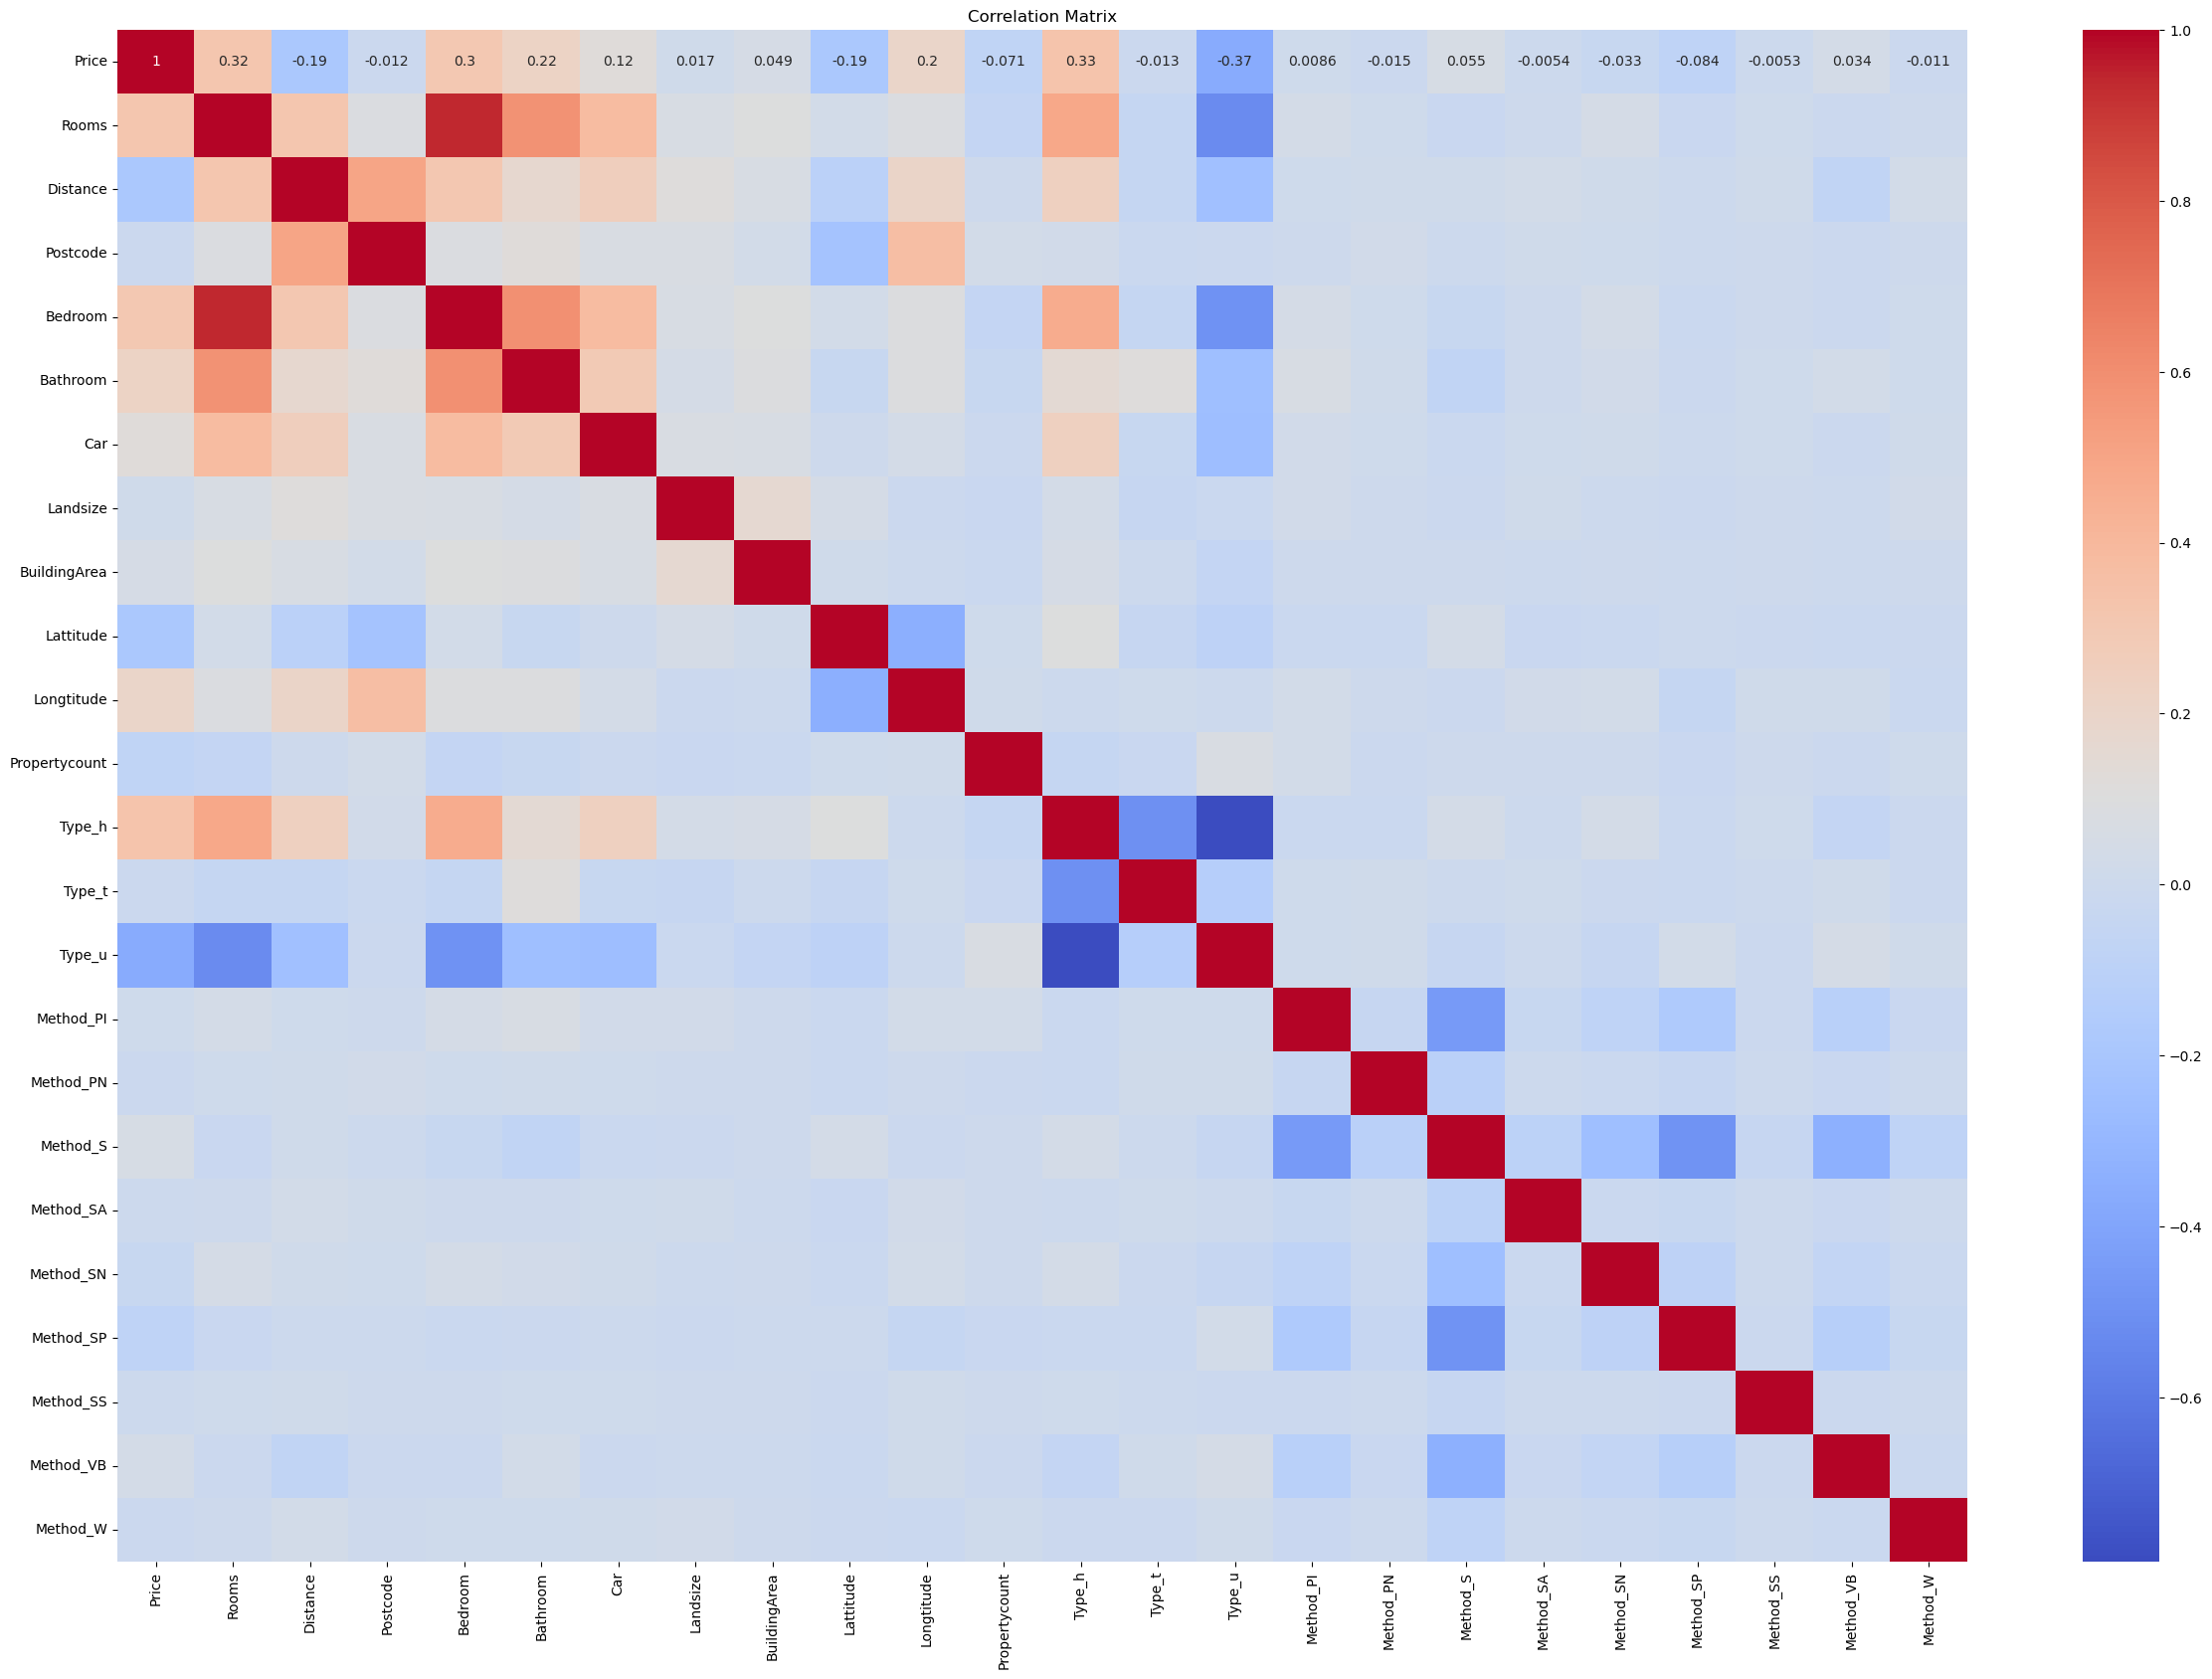

In [481]:
# Correlation matrix
plt.figure(figsize=(30, 20))

#Drop columns for all player names 
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 5. Spliting the final housing dataframe for the training, testing and validation data.

### We want to use Price for Predicting House Prices in Melbourne occuring in 2015-2017

In [483]:

# Drop columns for all player names and other columns not needed to enhance the model, avoid any collinearities 
# Where X is our features, dropping features that has lower than correlation value of 0.50 
X = df_cleaned.drop(['Price','Postcode','Lattitude','Longtitude'],axis=1)

# Where y is our Actual labels
y = df_cleaned['Price']

### Train-Test-Validation Split

In [484]:
from sklearn.model_selection import train_test_split

# Split from the full dataset into training and testing sets (Using 20% from the full dataset for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split from training data into training and validation sets (Using 20% from the training set for validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 


### Apply normalisation on X (both the training and test set)

One reason this is important is because the variables are multiplied by the model weights. So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without normalization, normalization makes training much more stable.

In [485]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

# transform validation data
X_val_norm = norm.transform(X_val)


In [486]:
X_train_norm.shape,X_val_norm.shape,X_test_norm.shape

((16000, 20), (4000, 20), (5001, 20))

## Use the models

In [487]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#### Model training

In [488]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train_norm,y_train)

#Random Forest
rf = RandomForestRegressor()
rf.fit(X_train_norm,y_train)

#Gradient Boosting Regressor
xgb = GradientBoostingRegressor()
xgb.fit(X_train_norm,y_train)

#Support Vector Machine (Regression)
svr = SVR()
svr.fit(X_train_norm,y_train)

#K-Nearest Neighbour 
knn = KNeighborsRegressor()
knn.fit(X_train_norm,y_train)

#XBG Boost 
xgb = XGBRegressor()
xgb.fit(X_train_norm,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Prediction on the Test Data

In [489]:
y_pred1 = lr.predict(X_test_norm)
y_pred2 = rf.predict(X_test_norm)
y_pred3 = xgb.predict(X_test_norm)
y_pred4= svr.predict(X_test_norm)
y_pred5= knn.predict(X_test_norm)
y_pred6 = xgb.predict(X_test_norm)

### Evaluating the Algorithm

In [490]:
from sklearn import metrics

## Computing their R squared values on the testing data

In [491]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)
score6 = metrics.r2_score(y_test,y_pred6)

In [492]:
print(score1,score2,score3,score4,score5,score6)

0.28875496293063807 0.5278383811128831 0.5549319041148278 -0.021372579653235135 0.38072338273810136 0.5549319041148278


In [493]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','SVR','KNN','XGB'],"R2_SCORE":[score1,score2,score3,score4,score5,score6]})
final_data

,Models,R2_SCORE
0,LR,0.288755
1,RF,0.527838
2,GBR,0.554932
3,SVR,-0.021373
4,KNN,0.380723
5,XGB,0.554932


<Axes: xlabel='Models', ylabel='R2_SCORE'>

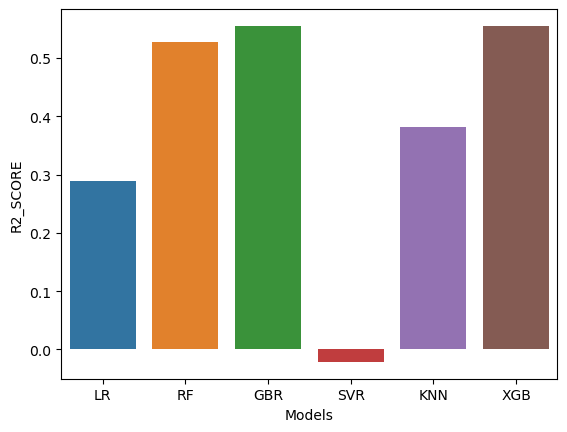

In [494]:
sns.barplot(final_data, x="Models", y="R2_SCORE")

### Similarly for the validation data

In [495]:
y_pred1 = lr.predict(X_val_norm)
y_pred2 = rf.predict(X_val_norm)
y_pred3 = xgb.predict(X_val_norm)
y_pred4= svr.predict(X_val_norm)
y_pred5= knn.predict(X_val_norm)
y_pred6 = xgb.predict(X_val_norm)

In [496]:
score1 = metrics.r2_score(y_val,y_pred1)
score2 = metrics.r2_score(y_val,y_pred2)
score3 = metrics.r2_score(y_val,y_pred3)
score4 = metrics.r2_score(y_val,y_pred4)
score5 = metrics.r2_score(y_val,y_pred5)
score6 = metrics.r2_score(y_val,y_pred6)

In [497]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','SVR','KNN','XGB'],"R2_SCORE":[score1,score2,score3,score4,score5,score6]})
final_data

,Models,R2_SCORE
0,LR,0.245198
1,RF,0.526138
2,GBR,0.548706
3,SVR,-0.026588
4,KNN,0.378730
5,XGB,0.548706


<Axes: xlabel='Models', ylabel='R2_SCORE'>

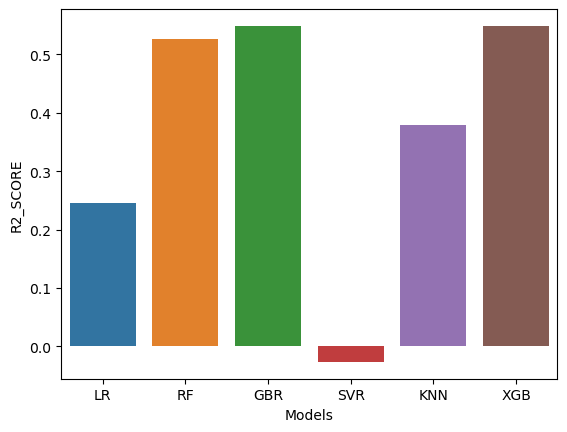

In [498]:
sns.barplot(final_data, x="Models", y="R2_SCORE")

## In addition Compute their mean square errors for the training, testing and validation data

In [499]:
from sklearn.metrics import mean_squared_error as mse

###  Refer from this link https://encord.com/glossary/mean-square-error-mse/#:~:text=By%20squaring%20the%20differences%2C%20the,values%2C%20reflecting%20better%20overall%20performance.

In [500]:
#Regression
print(mse(lr.predict(X_train_norm),y_train,squared=False), mse(lr.predict(X_test_norm),y_test,squared=False),mse(lr.predict(X_val_norm),y_val,squared=False))

#XBG Boost 
print(mse(xgb.predict(X_train_norm),y_train,squared=False), mse(xgb.predict(X_test_norm),y_test,squared=False),mse(xgb.predict(X_val_norm),y_val,squared=False))

#Support Vector Machine (Regression)
print(mse(svr.predict(X_train_norm),y_train,squared=False), mse(svr.predict(X_test_norm),y_test,squared=False),mse(svr.predict(X_val_norm),y_val,squared=False))

#K-Nearest Neighbour 
print(mse(knn.predict(X_train_norm),y_train,squared=False), mse(knn.predict(X_test_norm),y_test,squared=False),mse(knn.predict(X_val_norm),y_val,squared=False))

#Random Forest
print(mse(rf.predict(X_train_norm),y_train,squared=False), mse(rf.predict(X_test_norm),y_test,squared=False),mse(rf.predict(X_val_norm),y_val,squared=False))

#Gradient Boosting Regressor
print(mse(xgb.predict(X_train_norm),y_train,squared=False), mse(xgb.predict(X_test_norm),y_test,squared=False),mse(xgb.predict(X_val_norm),y_val,squared=False))

286449.2401103208 283536.33115453966 298424.7990476434
170023.6604569138 224291.24558094732 230753.5731196594
342816.95218276605 339774.81771451415 348029.8138935445
219245.62244436058 264570.50851328025 270743.7561224997
89146.97070614995 231017.26160314813 236452.65986318229
170023.6604569138 224291.24558094732 230753.5731196594


### Save the best fitted models

In [501]:
rf_final = xgb.fit(X,y)
rf_final

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [502]:
import joblib
joblib.dump(rf_final,'price_predictor')

['price_predictor']

In [503]:
model = joblib.load('price_predictor')

In [504]:
X

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,2,2.5,2,1,1,126.0,136.0,4019,1,0,0,0,0,0,0,0,0,1,0,0
1,2,2.5,2,1,1,202.0,136.0,4019,1,0,0,0,0,1,0,0,0,0,0,0
2,2,2.5,2,1,0,156.0,79.0,4019,1,0,0,0,0,1,0,0,0,0,0,0
3,3,2.5,3,2,1,0.0,136.0,4019,0,0,1,0,0,0,0,0,0,0,1,0
4,3,2.5,3,2,0,134.0,150.0,4019,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,3,6.3,3,1,2,288.0,136.0,6543,1,0,0,0,0,1,0,0,0,0,0,0
34852,4,6.3,4,1,3,593.0,136.0,6543,1,0,0,1,0,0,0,0,0,0,0,0
34853,2,6.3,2,2,1,98.0,104.0,6543,1,0,0,0,0,0,0,0,1,0,0,0
34854,2,6.3,2,1,2,220.0,120.0,6543,0,1,0,0,0,1,0,0,0,0,0,0


In [505]:
property_1 = {"Rooms": 2, "Distance": 2.5, "Bedroom": 2, "Bathroom": 1, "Car": 1, "Landsize": 126.0, "BuildingArea": 136.0, "Propertycount": 4019, "Type_h": 1, "Type_t": 0, "Type_u": 0, "Method_PI": 0, "Method_PN": 0, "Method_S": 0, "Method_SA": 0, "Method_SN": 0, "Method_SP": 1, "Method_SS": 0, "Method_VB": 0, "Method_W": 0}

In [506]:
import pandas as pd
data_new = pd.DataFrame(property_1,index=[0])
model.predict(data_new)

array([959911.7], dtype=float32)

### Does it match to the actual data for prices?

In [507]:
y = df_cleaned['Price']
y.head(1)

0    870000.0
Name: Price, dtype: float64

#### Check for the second row

In [508]:
property_2 ={"Rooms": 2, "Distance": 2.5, "Bedroom": 2, "Bathroom": 1, "Car": 1, "Landsize": 202.0, "BuildingArea": 136.0, "Propertycount": 4019, "Type_h": 1, "Type_t": 0, "Type_u": 0, "Method_PI": 0, "Method_PN": 0, "Method_S": 1, "Method_SA": 0, "Method_SN": 0, "Method_SP": 0, "Method_SS": 0, "Method_VB": 0, "Method_W": 0}

In [509]:
import pandas as pd
data_new_2= pd.DataFrame(property_2,index=[0])
model.predict(data_new_2)

array([1126104.8], dtype=float32)

### Does it match to the actual data for prices?

In [510]:
y = df_cleaned['Price']
y.head(2) #Check the second row only

0     870000.0
1    1480000.0
Name: Price, dtype: float64

### The training data performs significantly better than the testing data, there is overfitting for the Random forest model. 
### Depends on the complexity of this model, this model will still be acceptable for good practise. 

# Further Modelling: Building Neural Networks

## Installing Tensorflow package

In [511]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [512]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [513]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
tf.random.set_seed(1)
np.random.seed(23)


## Simple Neural Network

In [515]:

#Define the simple neural network
simple_nn = Sequential()

#NOTE: we input (20, ) as our input shape because it is the number of columns we have in the final dataframe.

simple_nn.add(InputLayer((20,)))
simple_nn.add(Dense(2,'relu'))
simple_nn.add(Dense(1,'linear'))

opt = Adam(learning_rate = 0.01)
cp = ModelCheckpoint('/tmp/ckpt/checkpoint.model.keras',save_best_only = True)
simple_nn.compile(optimizer = opt, loss = 'mse', metrics = [RootMeanSquaredError()])
simple_nn.fit(x=X_train,y=y_train, validation_data = (X_val,y_val),callbacks = [cp], epochs = 100)



Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - loss: 820902690816.0000 - root_mean_squared_error: 904089.4375 - val_loss: 355293560832.0000 - val_root_mean_squared_error: 596065.0625
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 333400997888.0000 - root_mean_squared_error: 577322.0000 - val_loss: 346433028096.0000 - val_root_mean_squared_error: 588585.6250
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 326232834048.0000 - root_mean_squared_error: 571083.2500 - val_loss: 353461436416.0000 - val_root_mean_squared_error: 594526.2500
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 321253244928.0000 - root_mean_squared_error: 566708.8750 - val_loss: 365125468160.0000 - val_root_mean_squared_error: 604256.1250
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 315999191040.0000 - root_mean_squared_error: 562055.6875 - val_loss: 382439522304.0000 - val_root_mean_squared_error: 618416.9375
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━

In [516]:
from tensorflow.keras.models import load_model
simple_nn = load_model('/tmp/ckpt/checkpoint.model.keras')

#Compute the mean square errors from the simple neural network
#We want to ensure our simple neural network improves overfitting for both the training and validation data.
#Test the learning rate to see different results (relatively a small learning value will be good enough).
mse(simple_nn.predict(X_train), y_train, squared = False),mse(simple_nn.predict(X_val), y_val, squared = False)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


(574925.4168468849, 588585.5244097216)

In [517]:
history = simple_nn.fit(x=X_train,y=y_train, validation_data = (X_val,y_val),callbacks = [cp], batch_size = 32, epochs = 100, verbose = 1)
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - loss: 326232834048.0000 - root_mean_squared_error: 571083.2500 - val_loss: 353461436416.0000 - val_root_mean_squared_error: 594526.2500
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 321253244928.0000 - root_mean_squared_error: 566708.8750 - val_loss: 365125468160.0000 - val_root_mean_squared_error: 604256.1250
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 315999191040.0000 - root_mean_squared_error: 562055.6875 - val_loss: 382439522304.0000 - val_root_mean_squared_error: 618416.9375
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 310486106112.0000 - root_mean_squared_error: 557130.5000 - val_loss: 406571089920.0000 - val_root_mean_squared_error: 637629.2500
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 304717987840.0000 - root_mean_squared_error: 551929.9375 - val_loss: 438772760576.0000 - val_root_mean_squared_error: 662399.2500
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━

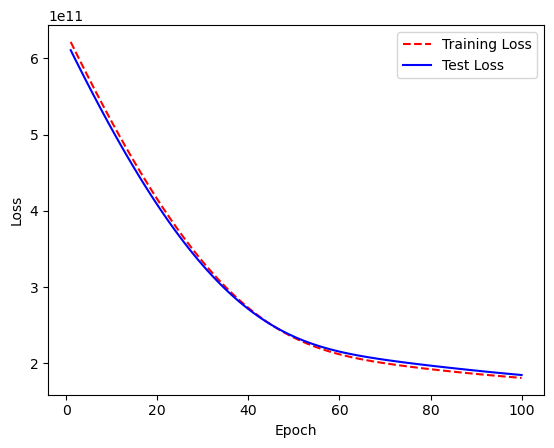

In [148]:
# Visualize loss history for the simple neural network
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## Medium neural network

In [149]:
medium_nn = Sequential()
medium_nn.add(InputLayer((818,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('/tmp/ckpt/checkpoint.model.keras', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 903190544384.0000 - root_mean_squared_error: 929812.6875 - val_loss: 141236944896.0000 - val_root_mean_squared_error: 375997.1875
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 124218621952.0000 - root_mean_squared_error: 351857.3750 - val_loss: 125398876160.0000 - val_root_mean_squared_error: 354357.0938
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 113681047552.0000 - root_mean_squared_error: 336460.4375 - val_loss: 116372447232.0000 - val_root_mean_squared_error: 341417.8750
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 106807263232.0000 - root_mean_squared_error: 326097.3438 - val_loss: 108625805312.0000 - val_root_mean_squared_error: 329917.6250
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 100670816256.0000 - root_mean_squared_error: 316555.2812 - val_loss: 102182690816.0000 - val_root_mean_squared_error: 320036.4375
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━

In [150]:
medium_nn = load_model('/tmp/ckpt/checkpoint.model.keras')
mse(medium_nn.predict(X_train), y_train, squared=False), mse(medium_nn.predict(X_val), y_val, squared=False)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


(294185.518491572, 293312.1239026678)

In [151]:
history = medium_nn.fit(x=X_train,y=y_train, validation_data = (X_val,y_val),callbacks = [cp], batch_size = 32, epochs = 100, verbose = 1)
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)


Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 77804822528.0000 - root_mean_squared_error: 278277.9375 - val_loss: 85766938624.0000 - val_root_mean_squared_error: 293336.5312
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 77374529536.0000 - root_mean_squared_error: 277521.3750 - val_loss: 85846155264.0000 - val_root_mean_squared_error: 293472.5000
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 76995330048.0000 - root_mean_squared_error: 276849.9688 - val_loss: 85908021248.0000 - val_root_mean_squared_error: 293578.5625
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 76586098688.0000 - root_mean_squared_error: 276124.2188 - val_loss: 86005833728.0000 - val_root_mean_squared_error: 293745.4062
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 76134195200.0000 - root_mean_squared_error: 275314.7188 - val_loss: 86174334976.0000 - val_root_mean_squared_error: 294029.5938
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 707

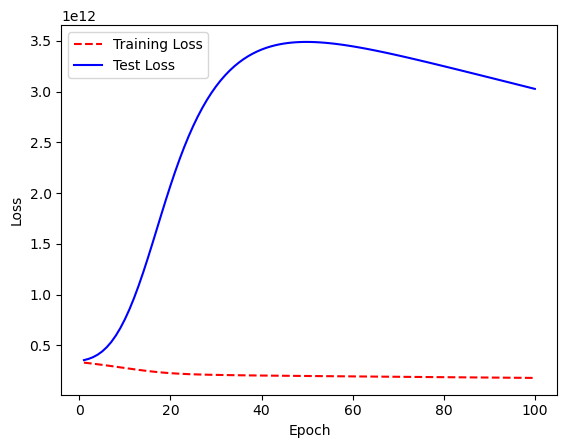

In [518]:
# Visualize loss history for the medium neural network
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## Large Neural Network

In [519]:
large_nn = Sequential()
large_nn.add(InputLayer((20,))) #Must match the columns from the dataset before modelling
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('/tmp/ckpt/checkpoint.model.keras', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 500642873344.0000 - root_mean_squared_error: 692738.1250 - val_loss: 638127570944.0000 - val_root_mean_squared_error: 798828.8750
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 362717577216.0000 - root_mean_squared_error: 594919.0000 - val_loss: 976513400832.0000 - val_root_mean_squared_error: 988186.9375
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 962645655552.0000 - root_mean_squared_error: 981127.4375 - val_loss: 976388947968.0000 - val_root_mean_squared_error: 988123.9375
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 962529067008.0000 - root_mean_squared_error: 981068.0000 - val_loss: 976283697152.0000 - val_root_mean_squared_error: 988070.6875
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 962426437632.0000 - root_mean_squared_error: 981015.6875 - val_loss: 976184934400.0000 - val_root_mean_squared_error: 988020.6875
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━

In [520]:
large_nn = load_model('/tmp/ckpt/checkpoint.model.keras')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step


(764134.99079186, 798828.9391151639)

In [521]:
history = large_nn.fit(x=X_train,y=y_train, validation_data = (X_val,y_val),callbacks = [cp], batch_size = 32, epochs = 100, verbose = 1)
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - loss: 362717577216.0000 - root_mean_squared_error: 594919.0000 - val_loss: 976513400832.0000 - val_root_mean_squared_error: 988186.9375
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 962645655552.0000 - root_mean_squared_error: 981127.4375 - val_loss: 976388947968.0000 - val_root_mean_squared_error: 988123.9375
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 962529067008.0000 - root_mean_squared_error: 981068.0000 - val_loss: 976283697152.0000 - val_root_mean_squared_error: 988070.6875
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 962426437632.0000 - root_mean_squared_error: 981015.6875 - val_loss: 976184934400.0000 - val_root_mean_squared_error: 988020.6875
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 962328920064.0000 - root_mean_squared_error: 980966.0000 - val_loss: 976089120768.0000 - val_root_mean_squared_error: 987972.2500
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━

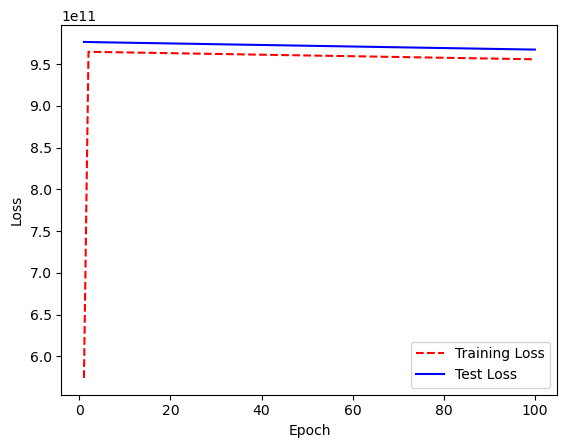

In [522]:
# Visualize loss history for the large neural network
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [526]:
mse(xgb.predict(X_test), y_test, squared=False)

178782.2517811736

### Methods to reduce overfitting refer to this link:

#### https://datascience.stackexchange.com/questions/65471/validation-loss-much-higher-than-training-loss

## Huge credit for these legends that helped me with this project.

#### Author: DanB (Melbourne Housing Snapshot)
#### NeuralNine: https://www.youtube.com/watch?v=Wqmtf9SA_kk&t=676s
#### Greg Hogg: https://www.youtube.com/watch?v=_-UCcuB8nbw